## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import cv2
import os

## Creating Training and Testing directory by loading images from a local directory

In [2]:
TRAIN_DIR = 'cats&dogs/training_set/'
TEST_DIR = 'cats&dogs/test_set/'

## Displaying an image and its pixel values

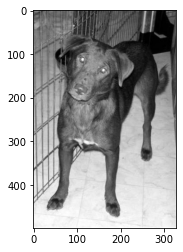

In [3]:
category=['dogs','cats']
for i in category:
    path=os.path.join(TRAIN_DIR,i)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break  

In [4]:
#Displaying the pixel values
print(img_array)

[[227 156 121 ... 109 104 103]
 [237 158 113 ...  91  87  86]
 [233 152 107 ...  61  59  60]
 ...
 [255 253 249 ... 238 237 237]
 [255 254 251 ... 244 243 243]
 [255 255 253 ... 249 247 248]]


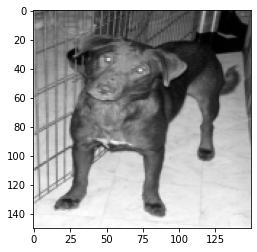

In [5]:
#Resizing all the images so as to maintain size consistency
IMG_SIZE=150
new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE), interpolation=cv2.INTER_AREA)
plt.imshow(new_array,cmap='gray')
plt.show()

## Creating training and testing data which is to be used in creating our model

In [6]:
training_data=[]
def create_training_data():
    for i in category:
        path=os.path.join(TRAIN_DIR,i)
        class_num=category.index(i)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE),interpolation=cv2.INTER_AREA)
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [7]:
training_data

[[array([[187, 118, 130, ...,  95,  91,  80],
         [182, 101, 111, ...,  75,  79,  72],
         [177,  84,  77, ...,  88,  86,  69],
         ...,
         [250, 241, 240, ..., 234, 233, 232],
         [251, 241, 238, ..., 235, 233, 231],
         [254, 249, 246, ..., 243, 244, 242]], dtype=uint8), 0],
 [array([[120, 109, 102, ..., 123, 123, 122],
         [115, 112, 113, ..., 121, 120, 119],
         [ 91,  90, 100, ..., 123, 123, 122],
         ...,
         [199, 207, 204, ...,  93,  95,  91],
         [197, 205, 207, ...,  92,  92,  91],
         [189, 198, 202, ...,  92,  94,  95]], dtype=uint8), 0],
 [array([[187, 186, 187, ...,  31,  35,  33],
         [185, 187, 186, ...,  43,  39,  32],
         [184, 184, 185, ...,  44,  42,  35],
         ...,
         [161, 160, 156, ...,  74,  72,  68],
         [165, 165, 161, ...,  72,  68,  64],
         [169, 169, 165, ...,  67,  65,  71]], dtype=uint8), 0],
 [array([[ 13,  12,   7, ...,  95, 170, 161],
         [ 14,  14,   8, ..

In [8]:
len(training_data)

8005

In [ ]:
import random
random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])

In [9]:
testing_data=[]
def create_testing_data():
    for i in category:
        path=os.path.join(TEST_DIR,i)
        class_num=category.index(i)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE),interpolation=cv2.INTER_AREA)
                testing_data.append([new_array,class_num])
            except Exception as e:
                pass
create_testing_data()

In [10]:
testing_data

[[array([[ 93,  38,  24, ..., 149, 146, 140],
         [114,  44,  26, ..., 152, 148, 142],
         [125,  59,  46, ..., 153, 148, 144],
         ...,
         [126, 132, 128, ..., 145, 147, 145],
         [127, 127, 125, ..., 141, 145, 142],
         [129, 128, 129, ..., 143, 145, 141]], dtype=uint8), 0],
 [array([[ 24,  23,  22, ...,  38,  30,  29],
         [ 26,  25,  24, ...,  38,  30,  28],
         [ 25,  25,  24, ...,  38,  30,  30],
         ...,
         [ 87,  86,  82, ...,  27,  26,  25],
         [ 73,  85, 115, ...,  27,  26,  27],
         [102, 117, 139, ...,  27,  27,  27]], dtype=uint8), 0],
 [array([[ 7,  7,  7, ...,  7,  4,  3],
         [ 7,  7,  7, ...,  6,  3,  2],
         [ 7,  7,  7, ...,  5,  2,  2],
         ...,
         [21, 28, 30, ..., 16, 20, 23],
         [16, 22, 28, ..., 14, 14, 16],
         [26, 23, 25, ..., 24, 19, 16]], dtype=uint8), 0],
 [array([[ 36,  64,  16, ...,  30,  30,  29],
         [ 29,  69,  15, ...,  29,  25,  26],
         [ 25,  7

In [11]:
len(testing_data)

2023

In [ ]:
random.shuffle(testing_data)

for sample in testing_data[:10]:
    print(sample[1])

Now i have taken all the input data in 'X' variable and the output data in 'y' variable.
After that we will resize the 'X' variable into 3D matrix as i will be using CNN model.

In [12]:
X=[]
y=[]

for features,label in training_data:
    X.append(features)
    y.append(label)

In [13]:
len(X)

8005

In [14]:
len(y)

8005

In [15]:
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
X.shape

(8005, 150, 150, 1)

## Importing required libraries and then creating our CNN model 

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [17]:
model=Sequential()
model.add(Conv2D(100,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(50,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(50,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(100))
model.add(Activation('sigmoid'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
X=X/255.0
y=np.array(y,dtype=np.uint8)

In [19]:
hist=model.fit(X,y,validation_split=0.2,epochs=20)

Train on 6404 samples, validate on 1601 samples
Epoch 1/20
6404/6404 [==============================] - 1681s 263ms/sample - loss: 0.6563 - accuracy: 0.6259 - val_loss: 1.2418 - val_accuracy: 0.0962
Epoch 2/20
6404/6404 [==============================] - 1610s 251ms/sample - loss: 0.6127 - accuracy: 0.6618 - val_loss: 0.8074 - val_accuracy: 0.4341
Epoch 3/20
6404/6404 [==============================] - 1622s 253ms/sample - loss: 0.5556 - accuracy: 0.7197 - val_loss: 0.6060 - val_accuracy: 0.7127
Epoch 4/20
6404/6404 [==============================] - 1614s 252ms/sample - loss: 0.4990 - accuracy: 0.7584 - val_loss: 1.0382 - val_accuracy: 0.4097
Epoch 5/20
6404/6404 [==============================] - 1617s 252ms/sample - loss: 0.4615 - accuracy: 0.7831 - val_loss: 1.1108 - val_accuracy: 0.3991
Epoch 6/20
6404/6404 [==============================] - 1610s 251ms/sample - loss: 0.4442 - accuracy: 0.7928 - val_loss: 1.1640 - val_accuracy: 0.4147
Epoch 7/20
6404/6404 [========================

In [20]:
model.save('cats&dogs.h5', hist)

Now using the testing data created earlier, i will use my model to recognize the image(data) and then i will cross check my result with the given output to verify that my model is accurate.

In [21]:
testing_data

[[array([[ 93,  38,  24, ..., 149, 146, 140],
         [114,  44,  26, ..., 152, 148, 142],
         [125,  59,  46, ..., 153, 148, 144],
         ...,
         [126, 132, 128, ..., 145, 147, 145],
         [127, 127, 125, ..., 141, 145, 142],
         [129, 128, 129, ..., 143, 145, 141]], dtype=uint8), 0],
 [array([[ 24,  23,  22, ...,  38,  30,  29],
         [ 26,  25,  24, ...,  38,  30,  28],
         [ 25,  25,  24, ...,  38,  30,  30],
         ...,
         [ 87,  86,  82, ...,  27,  26,  25],
         [ 73,  85, 115, ...,  27,  26,  27],
         [102, 117, 139, ...,  27,  27,  27]], dtype=uint8), 0],
 [array([[ 7,  7,  7, ...,  7,  4,  3],
         [ 7,  7,  7, ...,  6,  3,  2],
         [ 7,  7,  7, ...,  5,  2,  2],
         ...,
         [21, 28, 30, ..., 16, 20, 23],
         [16, 22, 28, ..., 14, 14, 16],
         [26, 23, 25, ..., 24, 19, 16]], dtype=uint8), 0],
 [array([[ 36,  64,  16, ...,  30,  30,  29],
         [ 29,  69,  15, ...,  29,  25,  26],
         [ 25,  7

In [22]:
x1=[]
y1=[]

for features,label in testing_data:
    x1.append(features)
    y1.append(label)

In [23]:
x1=np.array(x1).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x1

array([[[[ 93],
         [ 38],
         [ 24],
         ...,
         [149],
         [146],
         [140]],

        [[114],
         [ 44],
         [ 26],
         ...,
         [152],
         [148],
         [142]],

        [[125],
         [ 59],
         [ 46],
         ...,
         [153],
         [148],
         [144]],

        ...,

        [[126],
         [132],
         [128],
         ...,
         [145],
         [147],
         [145]],

        [[127],
         [127],
         [125],
         ...,
         [141],
         [145],
         [142]],

        [[129],
         [128],
         [129],
         ...,
         [143],
         [145],
         [141]]],


       [[[ 24],
         [ 23],
         [ 22],
         ...,
         [ 38],
         [ 30],
         [ 29]],

        [[ 26],
         [ 25],
         [ 24],
         ...,
         [ 38],
         [ 30],
         [ 28]],

        [[ 25],
         [ 25],
         [ 24],
         ...,
         [ 38],
         [

In [24]:
#Output values of all datas in testing directory
y1=np.array(y1,dtype=np.uint8)
y1

array([0, 0, 0, ..., 1, 1, 1], dtype=uint8)

In [25]:
x1=x1/255.0

In [26]:
#Predicted output of all datas in testing directory
pred=model.predict_classes(x1)
pred

array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]])

Now, I have taken 5 output values from my testing data and below i have predicted 5 input datas. The output values(0 and 1) represents images of Cats and Dogs. The predicted results almost matches with the output values, thus showing that my model is 80% accurate.  

In [28]:
#Displaying 5 output values
y1[:5]

array([0, 0, 0, 0, 0], dtype=uint8)

In [29]:
model.predict_classes(x1[:5])

array([[1],
       [0],
       [0],
       [0],
       [0]])

In [30]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y1,pred)

array([[936,  76],
       [357, 654]], dtype=int64)

In [31]:
print(classification_report(y1,pred))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81      1012
           1       0.90      0.65      0.75      1011

    accuracy                           0.79      2023
   macro avg       0.81      0.79      0.78      2023
weighted avg       0.81      0.79      0.78      2023



Here, we can calculate the model accuracy from the f1-score which shows around 80% accuracy.